In [19]:
import pandas as pd
import csv
from fbprophet import Prophet

In [20]:
confirmed = pd.read_csv('time_series_19-covid-Confirmed.csv')
deaths = pd.read_csv('time_series_19-covid-Deaths.csv')
recovered = pd.read_csv('time_series_19-covid-Recovered.csv')

In [36]:
confirmed.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20
0,Anhui,Mainland China,31.82570,117.2264,1,9,15,39,60,70,...,986,987,988,989,989,989,989,989,989,990
1,Beijing,Mainland China,40.18240,116.4142,14,22,36,41,68,80,...,393,395,396,399,399,399,400,400,410,410
2,Chongqing,Mainland China,30.05720,107.8740,6,9,27,57,75,110,...,560,567,572,573,575,576,576,576,576,576
3,Fujian,Mainland China,26.07890,117.9874,1,5,10,18,35,59,...,293,293,293,293,293,293,294,294,296,296
4,Gansu,Mainland China,36.06110,103.8343,0,2,2,4,7,14,...,91,91,91,91,91,91,91,91,91,91
5,Guangdong,Mainland China,23.34170,113.4244,26,32,53,78,111,151,...,1331,1332,1333,1339,1342,1345,1347,1347,1347,1348
6,Guangxi,Mainland China,23.82980,108.7881,2,5,23,23,36,46,...,244,245,246,249,249,251,252,252,252,252
7,Guizhou,Mainland China,26.81540,106.8748,1,3,3,4,5,7,...,146,146,146,146,146,146,146,146,146,146
8,Hainan,Mainland China,19.19590,109.7453,4,5,8,19,22,33,...,168,168,168,168,168,168,168,168,168,168
9,Hebei,Mainland China,38.04280,114.5149,1,1,2,8,13,18,...,306,307,308,309,311,311,311,312,317,318


In [22]:
deaths.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20
0,Anhui,Mainland China,31.8257,117.2264,0,0,0,0,0,0,...,6,6,6,6,6,6,6,6,6,6
1,Beijing,Mainland China,40.1824,116.4142,0,0,0,0,0,1,...,4,4,4,4,4,4,4,4,5,7
2,Chongqing,Mainland China,30.0572,107.8740,0,0,0,0,0,0,...,5,6,6,6,6,6,6,6,6,6
3,Fujian,Mainland China,26.0789,117.9874,0,0,0,0,0,0,...,0,1,1,1,1,1,1,1,1,1
4,Gansu,Mainland China,36.0611,103.8343,0,0,0,0,0,0,...,2,2,2,2,2,2,2,2,2,2


In [23]:
recovered.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20
0,Anhui,Mainland China,31.8257,117.2264,0,0,0,0,0,0,...,413,474,539,597,637,663,712,744,792,821
1,Beijing,Mainland China,40.1824,116.4142,0,0,1,2,2,2,...,145,153,169,178,189,198,215,235,248,257
2,Chongqing,Mainland China,30.0572,107.8740,0,0,0,0,0,0,...,274,299,316,328,335,349,372,384,401,422
3,Fujian,Mainland China,26.0789,117.9874,0,0,0,0,0,0,...,112,126,149,162,170,183,199,218,228,235
4,Gansu,Mainland China,36.0611,103.8343,0,0,0,0,0,0,...,65,71,76,76,78,80,80,81,81,82


In [24]:
conf = confirmed.iloc[:,4:].sum(axis=0).reset_index().rename(columns={"index":"ds", 0:"y"})
death = deaths.iloc[:,4:].sum(axis=0).reset_index().rename(columns={"index":"ds", 0:"y"})
rec = recovered.iloc[:,4:].sum(axis=0).reset_index().rename(columns={"index":"ds", 0:"y"})

In [25]:
conf.head()

,ds,y
0,1/22/20,555
1,1/23/20,653
2,1/24/20,941
3,1/25/20,1434
4,1/26/20,2118


In [26]:
death.head()

,ds,y
0,1/22/20,17
1,1/23/20,18
2,1/24/20,26
3,1/25/20,42
4,1/26/20,56


In [27]:
rec.head()

,ds,y
0,1/22/20,28
1,1/23/20,30
2,1/24/20,36
3,1/25/20,39
4,1/26/20,52


In [28]:
c = Prophet(daily_seasonality=True)
c.fit(conf)
d = Prophet(daily_seasonality=True)
d.fit(death)
r = Prophet(daily_seasonality=True)
r.fit(rec)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


In [29]:
# Predictions for a week from now
c_future = c.make_future_dataframe(periods=7)
d_future = d.make_future_dataframe(periods=7)
r_future = r.make_future_dataframe(periods=7)

In [30]:
c_forecast = c.predict(c_future)
d_forecast = d.predict(d_future)
r_forecast = r.predict(r_future)

In [31]:
# Forecast only next week
c_forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(7)

,ds,yhat,yhat_lower,yhat_upper
38,2020-02-29,97591.422707,90227.004715,105675.680838
39,2020-03-01,99795.416621,92087.769951,107288.541935
40,2020-03-02,101617.608945,94688.073771,108993.127969
41,2020-03-03,103898.238787,96242.524041,111568.088436
42,2020-03-04,107032.972673,98907.459180,113961.964446
43,2020-03-05,110764.390648,103324.409908,118064.363237
44,2020-03-06,113107.669824,105360.406862,120727.890159


In [159]:
d_forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(7)

,ds,yhat,yhat_lower,yhat_upper
38,2020-02-29,3038.750265,3000.273229,3079.853342
39,2020-03-01,3115.567688,3072.302794,3155.962052
40,2020-03-02,3216.985110,3171.409011,3261.880170
41,2020-03-03,3305.047383,3253.914374,3360.152131
42,2020-03-04,3366.745045,3306.236731,3427.971681
43,2020-03-05,3467.392236,3395.207368,3539.281361
44,2020-03-06,3540.680164,3454.036399,3632.354606


In [185]:
a = pd.DataFrame()
confirmed.loc[confirmed["Province/State"].isna(), 'Province/State'] = confirmed.loc[confirmed["Province/State"].isna(), 'Country/Region']
df = r_forecast[['ds', 'yhat']][-7:].T
df.columns = df.iloc[0]
df = df.drop(df.index[0])
df.insert(0, 'Location', 'Italy')
df.insert(1, 'Lat', confirmed.loc[confirmed['Province/State'] == 'Italy', 'Lat'].item())
df.insert(2, 'Long', confirmed.loc[confirmed['Province/State'] == 'Italy', 'Long'].item())

dc = c_forecast[['ds', 'yhat']][-7:].T
dc.columns = dc.iloc[0]
dc = dc.drop(dc.index[0])
dc.insert(0, 'Location', 'Global')
dc.insert(1, 'Lat', None)
dc.insert(2, 'Long', None)
a.append(df).append(dc)

ds,Location,Lat,Long,2020-02-29 00:00:00,2020-03-01 00:00:00,2020-03-02 00:00:00,2020-03-03 00:00:00,2020-03-04 00:00:00,2020-03-05 00:00:00,2020-03-06 00:00:00
yhat,Italy,43.0,12.0,37492.9,39333.6,41495.6,43866.6,46190.9,48547.8,50712.2
yhat,Global,NaN,NaN,97591.4,99795.4,101618,103898,107033,110764,113108


In [182]:
confirmed.loc[confirmed['Province/State'] == 'Italy', 'Lat'].item()

43.0

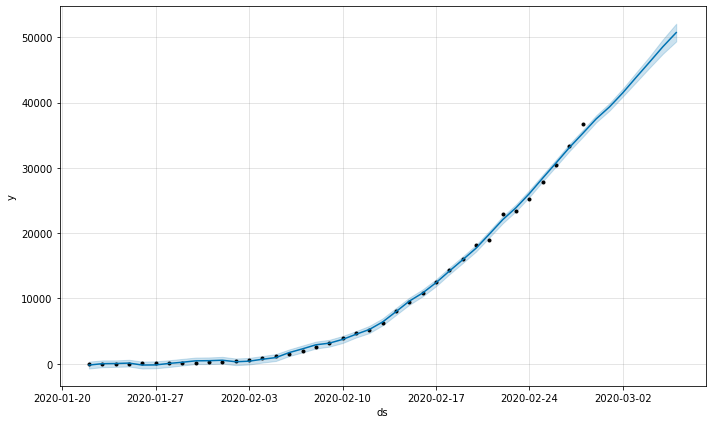

In [34]:
fig1 = r.plot(r_forecast)

In [175]:
confirmed.loc[confirmed["Province/State"].isna(), 'Province/State'] = confirmed.loc[confirmed["Province/State"].isna(), 'Country/Region']

In [176]:
confirmed

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20
0,Anhui,Mainland China,31.8257,117.2264,1,9,15,39,60,70,...,986,987,988,989,989,989,989,989,989,990
1,Beijing,Mainland China,40.1824,116.4142,14,22,36,41,68,80,...,393,395,396,399,399,399,400,400,410,410
2,Chongqing,Mainland China,30.0572,107.8740,6,9,27,57,75,110,...,560,567,572,573,575,576,576,576,576,576
3,Fujian,Mainland China,26.0789,117.9874,1,5,10,18,35,59,...,293,293,293,293,293,293,294,294,296,296
4,Gansu,Mainland China,36.0611,103.8343,0,2,2,4,7,14,...,91,91,91,91,91,91,91,91,91,91
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109,Lithuania,Lithuania,55.1694,23.8813,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
110,Mexico,Mexico,23.6345,-102.5528,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
111,New Zealand,New Zealand,-40.9006,174.8860,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
112,Nigeria,Nigeria,9.0820,8.6753,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [107]:
[confirmed.iloc[i, 4:].reset_index().rename(columns={"index": "ds", 0: "y"}) for i in range(confirmed.shape[0])]

[         ds    y
 0   1/22/20    1
 1   1/23/20    9
 2   1/24/20   15
 3   1/25/20   39
 4   1/26/20   60
 5   1/27/20   70
 6   1/28/20  106
 7   1/29/20  152
 8   1/30/20  200
 9   1/31/20  237
 10   2/1/20  297
 11   2/2/20  340
 12   2/3/20  408
 13   2/4/20  480
 14   2/5/20  530
 15   2/6/20  591
 16   2/7/20  665
 17   2/8/20  733
 18   2/9/20  779
 19  2/10/20  830
 20  2/11/20  860
 21  2/12/20  889
 22  2/13/20  910
 23  2/14/20  934
 24  2/15/20  950
 25  2/16/20  962
 26  2/17/20  973
 27  2/18/20  982
 28  2/19/20  986
 29  2/20/20  987
 30  2/21/20  988
 31  2/22/20  989
 32  2/23/20  989
 33  2/24/20  989
 34  2/25/20  989
 35  2/26/20  989
 36  2/27/20  989
 37  2/28/20  990,
          ds    1
 0   1/22/20   14
 1   1/23/20   22
 2   1/24/20   36
 3   1/25/20   41
 4   1/26/20   68
 5   1/27/20   80
 6   1/28/20   91
 7   1/29/20  111
 8   1/30/20  114
 9   1/31/20  139
 10   2/1/20  168
 11   2/2/20  191
 12   2/3/20  212
 13   2/4/20  228
 14   2/5/20  253
 15   2/6